#  **Scrapping et résumé d'articles Le Monde** - par Quentin Gibon

---


## Introduction
L'objectif de ce projet est de résumer des articles de presse. Nous avons choisi ici de nous concentrer sur ceux du journal [Le Monde](https://www.lemonde.fr/), nous utiliserons le site web de ce journal pour scrapper le contenu des articles.

Le domaine dans lequel se place cette étude se nomme le Traitement Automatique du Langage naturel (TAL) ou Natural Language Processing (NLP) en anglais. C'est un des domaines de recherche les plus actifs en science des données actuellement, à l’intersection du Machine Learning et de la linguistique. Il a pour but d’extraire des informations et une signification d’un contenu textuel.

Les algorithmes concernant notre sujet (le résumé automatique d’un contenu) sont soit ce qu'on appelle extractifs, soit abstractifs en fonction du résumé généré. Les algorithmes d'extraction forment des résumés en identifiant et en collant ensemble les sections pertinentes du texte d'entrée. Ainsi, ils ne dépendent que de l'extraction des phrases du texte original.

En revanche, les algorithmes abstractifs sont les plus humains et imitent le processus de paraphrase d'un texte, ce qui peut générer un nouveau texte qui n'est pas présent dans le document initial. Les textes résumés à l'aide de cette technique ressemblent davantage à des humains et produisent des résumés condensés. Cependant, les techniques abstractives sont beaucoup plus difficiles à mettre en œuvre que les techniques de synthèse extractive.

Ainsi toutes les solutions exposés ici seront issues d'algorithmes extractifs plus ou moins performants. Nous discuterons néanmoins des algorithmes abstractifs et des possibles implémentations à notre cas à la fin de ce notebook. 




---


# Scrapping

C'est la (logique) première étape du projet. Nous allons devoir extraire le contenu d'articles à partir du site du journal Le Monde. Ce choix a été fait totalement par hasard, étant le premier nom de journal d'actualités français auquel j'ai pensé.

Pour réaliser ce scrapping, nous faisons une requête avec `request` sur le site pour récupérer la page web, et la bibliothèque `BeautifulSoup` nous permet de scrapper le contenu qui nous intéresse.


In [1]:
import requests
from bs4 import BeautifulSoup

requete = requests.get("https://www.lemonde.fr/")
page = requete.content
soupAccueil = BeautifulSoup(page)

# cas d'article live
live = False
if(soupAccueil.find("div", {"class": "article article--main"}).find("span", {"class": "icon__label-live icon__label-live--xl"})):
    live = True
print("L'article est-il en live : ", live)

L'article est-il en live :  False


J'ai choisi de proposer deux options pour faciliter la prise en main. L'option "par défaut", s'occupe de trouver et scrapper automatiquement l'article en Une du site. Néanmoins j’ai distingué trois types d’articles pouvant êtres mis en Une. Les articles gratuit (complet et les plus fréquents), les articles payants (incomplet si non abonné, régulièrement mis en Une mais moins souvent) et les articles « live ». Les deux premiers peuvent êtres scrappé et utilisés, néanmoins cela sera moins cohérent dans le cas d’un article payant. Les articles live sont inutiles, notre programme par défaut vérifie donc à chaque fois que la Une n’est pas un live.

C’est pourquoi la deuxième option est plus simple, l’utilisateur n’a qu’à rentrer le lien de n’importe quel article Le Monde et le programme s’occupe de scrapper le contenu.

J'ai choisi de stocker les données dans un dictionnaire ayant cette architecture : 

```
mainArticle = 
{
  "title": "Le titre de l'article",
  "link": "Le lien pour acceder à l'article",
  "subTitle": "Le sous titre de l'article",
  "content": ["paragraphe 1", "paragraphe 2", ...]
}
```

L'étude du code html des pages articles m'a permis de déterminer quelles balises portaient l'information voulue.


In [2]:
# Option "par défaut"
if(not live):
    mainArticle = {
        "title": soupAccueil.find("div", {"class": "article article--main"}).find("span", {"class": "article__title-label"}).get_text().replace(u'\xa0', u' '),
        "link": soupAccueil.find("div", {"class": "article article--main"}).a["href"]
    }

    requete = requests.get(mainArticle["link"])
    page = requete.content
    soupMainArticle = BeautifulSoup(page)
    mainArticle["subTitle"] = soupMainArticle.find("p", {"class": "article__desc"}).get_text().replace(u'\xa0', u' ')
    paragraphes = soupMainArticle.find_all("p", {"class": "article__paragraph"})
    mainArticle["content"] = list(map(lambda para: para.get_text().replace(u'\xa0', u' '), paragraphes))

    print(mainArticle)
else:
  print("L'article principal est un live, utilisez la deuxième option svp")

{'title': 'L’acteur et metteur en scène de la démesure Robert Hossein est mort', 'link': 'https://www.lemonde.fr/disparitions/article/2020/12/31/robert-hossein-acteur-et-metteur-en-scene-de-la-demesure-est-mort_6064914_3382.html', 'subTitle': '    L’artiste, mort ce jeudi 31 décembre à l’âge de 93 ans, acquiert sa notoriété avec la série des « Angélique, marquise des anges » dans les années 1960. Passionné de scène, il dirige celle de Reims de 1971 à 1976, avant de se lancer dans des superproductions théâtrales qui connaîtront un énorme succès. ', 'content': ['Il aimait les loups et se voyait tel un loup dans la steppe, aux aguets, traqué par on ne sait quelle peur, courant toujours, éperdument. Le jeudi 31 décembre 2020, au lendemain de son anniversaire, sa course s’est arrêtée : Robert Hossein est mort à l’hôpital à la suite d’« un problème respiratoire », à 93 ans, a annoncé son épouse, la comédienne Candice Patou. « La seule chose que je laisserai, disait-il, c’est la balafre de Jo

In [3]:
#Récupère article sur un lien
live = True
lien = input("URL de l'article LeMonde.fr : ")
if(live):
    requete = requests.get(lien)
    page = requete.content
    soupAccueil = BeautifulSoup(page)
    
    mainArticle = {
        "title": soupAccueil.find("h1", {"class": "article__title"}).get_text().replace(u'\xa0', u' '),
        "link": lien
    }

    requete = requests.get(mainArticle["link"])
    page = requete.content
    soupMainArticle = BeautifulSoup(page)
    mainArticle["subTitle"] = soupMainArticle.find("p", {"class": "article__desc"}).get_text().replace(u'\xa0', u' ')
    paragraphes = soupMainArticle.find_all("p", {"class": "article__paragraph"})
    mainArticle["content"] = list(map(lambda para: para.get_text().replace(u'\xa0', u' '), paragraphes))

    print(mainArticle)

URL de l'article LeMonde.fr : https://www.lemonde.fr/planete/article/2020/12/27/covid-19-la-france-entame-sa-campagne-de-vaccination-ce-dimanche_6064577_3244.html
{'title': 'Covid-19 : une vingtaine de retraités et de soignants vaccinés en France', 'link': 'https://www.lemonde.fr/planete/article/2020/12/27/covid-19-la-france-entame-sa-campagne-de-vaccination-ce-dimanche_6064577_3244.html', 'subTitle': '    La première vaccination en France contre le Covid-19 s’est déroulée, dimanche, au sein d’une structure d’hébergement de personnes âgées à Sevran, dans la Seine-Saint-Denis. ', 'content': ['Jour J et lueur d’espoir en ce surlendemain de Noël : une vingtaine de personnes âgées et de soignants sont les premiers en France à se faire vacciner, dimanche 27 décembre.', 'Une femme de 78 ans a été la première personne vaccinée contre le Covid-19, à l’hôpital René-Muret de Sevran, dans la Seine-Saint-Denis, selon une journaliste de l’Agence France-Presse (AFP) sur place, et en présence du dire

# Bibliothèques et modules
Dans un premier temps nous avons besoin d’installer toutes les bibliothèques et autres modules qui nous serviront pour réaliser le projet. Comme nous le verrons par la suite, différents algorithmes ont été implémentés, ainsi beaucoup de choses sont à installer ! D'autant plus que nous avons besoin de modèles français, existants mais pas toujours faciles à trouver.

D'abord, nous utiliserons `SpaCy`. SpaCy est une jeune librairie (2015) qui offre des modèles pré-entraînés pour diverses applications, y compris la reconnaissance d’entités nommées. SpaCy est la principale alternative à `NLTK` (Natural Language Tool Kit), la librairie historique pour le TAL avec Python que nous utiliserons également car elle possède certains outils que SpaCy n'a pas. Parmis ces outils, on retrouve les `stop words`, mots fréquents et portants peu d'information, ou un stemmer `Snowball Stemmer` (nous en verrons plus tard l'utilité).

Un exemple de modèle SpaCy que nous chargeons est `fr_core_news_sm`, un réseau convolutionnel entraîné sur deux corpus, WikiNER et Sequoia, ce qui représente de gros volumes de données en français (typiquement plusieurs dizaines de Go).

Dans un deuxième temps nous utiliserons également ce qu'on appelle un `transformers`. Les transformers sont des modèles état-de-l’art qui apprennent des représentations vectorielles à partir d’un texte d’entrée et qui dépassent les capacités humaines sur certains points. Ces modèles peuvent être pré-entraînés et sont mis à disposition par Hugging Face, une startup spécialisée dans le traitement de langage naturel. Nous aurons en complément besoin de `PyTorch`.

Enfin `numpy` et `pandas` seront utiles pour quelques manipulations de données.


In [ ]:
!pip3 install spacy
!python3 -m spacy download fr_core_news_sm
import nltk
nltk.download("punkt")
from nltk.corpus import stopwords
from nltk.cluster.util import cosine_distance
import numpy as np
import pandas as pd
import networkx as nx
import spacy
import fr_core_news_sm
from sklearn.metrics.pairwise import cosine_similarity
nltk.download("stopwords")
import networkx as nx
from nltk.stem.snowball import SnowballStemmer

!pip install transformers
!python3 -m spacy download fr_core_news_md
!pip install omegaconf
!pip install hydra-core
!pip install sentencepiece
import torch
from scipy.spatial.distance import cosine
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import plotly.express as px
import fr_core_news_md

# Data pre-processing

Pour réaliser ce projet, j'ai choisi d'implémenter plusieurs algorithmes reposants sur plusieurs modèles. Néanmoins les techniques de pre-processing sont relativement classiques et ils utilisent plus ou moins les mêmes. Si je me suis inspiré des codes de plusieurs dépôts GitHub pour certains modèles, celui qui se trouve dans la cellule suivante est majoritairement « fait maison » et vous y retrouverez toutes les techniques de data pre-processing utilisés. Par soucis de simplicité nous appellerons par la suite ce modèle le modèle Gibon.

<br>

## La tokénisation
La tokenisation cherche à transformer un texte en une série de tokens individuels (un tableau de mots, ou de phrases). Dans l’idée, chaque token représente un mot (ou une phrase), et identifier des mots semble être une tâche relativement simple mais ce n'est pas toujours le cas en Français.

On retrouvera la tokenisation de nos phrases dans la fonction `return_token`.

<br>

## Filtrer les stop words
Certains mots se retrouvent très fréquemment dans la langue française. En anglais, on les appelle les « stop words ». Ces mots, bien souvent, n’apportent pas d’information et on cherche donc à les enlever. Les « stop words » sont établis comme des listes de mots. On charge la liste avec la ligne `stopwords.words('french')`.

<br>

## Le stemming
Le stemming consiste à réduire un mot dans sa forme « racine ». Le but du stemming est de regrouper de nombreuses variantes d’un mot comme un seul et même mot. Par exemple, une fois que l’on applique un stemming sur « Chiens » ou « Chien », le mot résultant est le même.

On peut charger le stemmer SnowBall avec `SnowballStemmer(language='french')` et appliquer `.stem()` sur chaque mot.

<br>

Et ce sera tout pour cette partie. Dans certains languages (comme l'anglais), il est aussi utile de retirer les accents, correspondant généralement à des fautes, mais ceux ci sont évidemment nécessaires en Français.

<br>

---
<br>

# Résumés
Etudions maintenant les différents algorithmes mis en place.

<br>

## Modèle Gibon

Lorsque nous construisons un système de traitement automatique du langage, nous utilisons généralement l’apprentissage automatique (machine learning en anglais). Puisque la machine ne comprend que les nombres, nous devons donc représenter chaque mot (ou token) de notre texte par une liste de valeurs numériques. L’une des principales promesses de l’apprentissage profond est que nous n’avons pas besoin de déterminer explicitement ces listes de valeurs. Dans le domaine du NLP, cela se traduit par des représentations vectorielles « sur étagère » de qualité des mots contenus dans les textes analysés. Ces représentations sont appelées « word embeddings »: des vecteurs représentant les mots au moyen de caractéristiques apprises en regardant de grandes quantités de textes.

Ce modèle ici repose sur la similarité entre les phrases. Grâce à **SpaCy**, nous pouvons facilement récupérer un vecteur correspondant à chaque mot une fois passé dans le modèle pré-entraîné en français `fr_core_news_sm`. Cela nous sert à représenter chaque mot comme étant un vecteur de taille 96, et c'est ce qu'on appelle **l'embedding** d'un mot. Nous déterminons ensuite l’embedding moyen d’une phrase en moyennant l’embedding de tous les mots de la phrase (dans la fonction `return_mean_embedding`).

Notre objectif est de trouver les phrases les plus représentatives de l'articles, celles qui portent le plus d'information utiles. Nous allons donc construire une *matrice de similarités* entre les phrases. Elle nous permettra de connaitre, une fois calculé, la mesure cosinus entre chaque phrases (dans la fonction `build_similarity_matrix`). Nous pourront ainsi classer les phrases de la plus "proche" des autres à la plus "lointaine".

Pour réaliser ce classement, on doit d'abord convertir la matrice de similarité en un graphe type `networkx`. Les nœuds de ce graphique représentent les phrases et les lien représentent les scores de similarité entre les phrases. Sur ce graphique, nous appliquerons l'algorithme `PageRank`. PageRank calcule un classement des nœuds dans le graphe `sentence_similarity_graph` en fonction de la structure des liens entrants. Il a été initialement conçu comme un algorithme pour classer les pages Web (utilisé par Google).

À partir de classement, on peut construire notre résumé. Dans notre exemple, nous choisissons de faire ressortir les 5 phrases les mieux classés, mais ce paramètre peut être modifié. Nous finissons avec quelques manipulations pour afficher les phrases sélectionnées dans l'ordre de leur apparition dans l'article (et non pas leur classement), cela aide à la compréhension.

In [ ]:
#-------------------------------- Modèle Gibon ---------------------------------

#tokeniser les mots
def return_token(sentence):
    nlp = fr_core_news_sm.load()
    # Tokeniser la phrase
    doc = nlp(sentence)
    # Retourner le texte de chaque token
    return [X.text for X in doc]

def return_mean_embedding(sentence):
    nlp = fr_core_news_sm.load()
    # Tokeniser la phrase
    doc = nlp(sentence)
    # Retourner la moyenne des vecteurs pour chaque phrase
    return np.mean([(X.vector) for X in doc], axis=0)
 
def build_similarity_matrix(sentences, sentence_vectors):
    # Create an empty similarity matrix
    sim_mat = np.zeros((len(sentences), len(sentences)))
 
    for i in range(len(sentences)):
        for j in range(len(sentences)):
            if i != j: #ignore if both are same sentences
                continue 
            sim_mat[i][j] = cosine_similarity(sentence_vectors[i].reshape(1,96), sentence_vectors[j].reshape(1,96))[0,0]

    return sim_mat


# MAIN

stop_words = stopwords.words('french')
summarize_text = []
nlp = fr_core_news_sm.load()

# Step 1 - Read text and tokenize
text = " ".join(mainArticle["content"])
tokenizer = nltk.data.load('tokenizers/punkt/PY3/french.pickle')
phrases = tokenizer.tokenize(text)

# Preprocessing
# Filtre les stop words et stemming
stemmer = SnowballStemmer(language='french')
clean_sentences = []
order = []
idx = 0
for sentence in phrases:
  clean_words = []
  order.append(idx)
  idx += 1
  for token in return_token(sentence):
    if token not in stop_words:
      clean_words.append(stemmer.stem(token))
  clean_sentences.append(" ".join(clean_words))

# New steps : vectorisation de nos phrases
phrases_vector = []
for sentence in clean_sentences:
  phrases_vector.append(return_mean_embedding(sentence))
# Step 2 - Generate Similary Martix across sentences
sentence_similarity_martix = build_similarity_matrix(phrases, phrases_vector)

# Step 3 - Rank sentences in similarity martix
sentence_similarity_graph = nx.from_numpy_array(sentence_similarity_martix)
scores = nx.pagerank(sentence_similarity_graph)
# Step 4 - Sort the rank and pick top sentences
ranked_sentence = sorted(((scores[i],s,order[i]) for i,s in enumerate(phrases)), reverse=True)

top_sents = []
for i in range(5):
  top_sents.append((ranked_sentence[i][1], ranked_sentence[i][2]))

summarize_text = sorted(top_sents, key=lambda ordre: ordre[1])

# Step 5 - output the summarize text
print("Summarize Text: \n", ".. ".join((summarize_text[i][0] for i in range(5))))

Summarize Text: 
 Une femme de 78 ans a été la première personne vaccinée en France contre le Covid-19, à l’hôpital René-Muret de Sevran, dans la Seine-Saint-Denis, selon une journaliste de l’Agence France-Presse (AFP) sur place, et en présence du directeur de l’agence régionale de santé (ARS) d’Ile-de-France, Aurélien Rousseau... « Je suis émue », a déclaré Mauricette, une ancienne aide ménagère, vaccinée au sein de l’unité de soins de longue durée de cet établissement de l’Assistance publique-Hôpitaux de Paris (AP-HP)... « Nous avons une nouvelle arme contre le virus : le vaccin... « Nous ne pouvons pas nous permettre de laisser flamber l’épidémie à nouveau », a prévenu dans le Journal du dimanche le ministre de la santé, Olivier Véran... « Ce vaccin protège 95 % des individus contre les cas de forme grave et va sauver beaucoup de vies », a-t-il estimé, se disant par ailleurs satisfait de pouvoir « commencer à protéger les plus fragiles d’entre nous ».


## Algorithmes basés sur le modèle CamemBERT

Nous avons compris que le point sensible d'un algorithme extractif est sa capacité d'embedding. Pour cela, des entreprises ou groupes de recherches ont développés des modèles pré entrainés. Le modèle linguistique le plus populaire, BERT, est pré-entraîné sur plus de 16 Go de données contenant 3,3 milliards de mots. La version de BERT la plus volumineuse a pris 4 jours complets et a mobilisé 64 unités TPU de Google pour être entraînée. De plus, la taille du jeu de données d’entrée et la quantité de ressources de calcul nécessaires à BERT sont constamment dépassées par les nouveaux modèles. D’autre part, un avantage de ces modèles est qu’une fois entraînés, ils peuvent être partagés à la communauté et donc être utilisés par d’autres praticiens du NLP, sans qu’ils aient besoin de recourir à de puissantes machines. Comme nous.

Mais nous avons besoin d'un modèle français, et le meilleur possible. Laissez moi vous présenter **camemBERT**.

Le premier modèle de langage de type BERT (plus précisément RoBERTa, développé par Facebook) en français est celui de camemBERT, sorti en 2019. Il a été entraîné sur le corpus OSCAR, une section française du jeu de données CommonCrawl (un jeu de données contenant les textes d’une grande quantité de pages Web). Dans l’article CamemBERT, les auteurs comparent les performances de leur modèle de langage français de type BERT à des modèles de référence, dont des modèles multilingues basés sur BERT (mBERT et UDify) et à un modèle qui n’utilise pas d’embeddings contextuels (UDPipe Future). A notre grand soulagement, ils démontrent dans leur papier la plus-value d’un modèle français pour la performance de différentes tâches de NLP. 

CamemBERT est une ressource très utile pour les praticiens en NLP qui travaillent avec des textes en français. Il permet de contrebalancer la scène du NLP, principalement anglophone. Le modèle a été mis à disposition dans la librairie Transformers, ce qui le rend actionnable off-the-shelf.

Aujourd'hui il est le seul modèle de ce type existant avec flauBERT, que nous n'utiliserons pas ici.

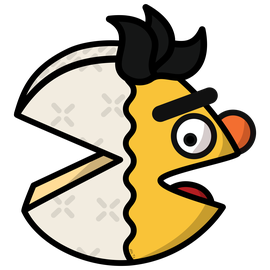

<br>

BERT est suffisamment sophistiqué pour analyser le sens de toutes les nuances du langage et ne nécessit pas de récourir aux étapes de pre-processing telles que la suppression des stop words, le stemming et les transformations en minuscules. À partir de ce modèle, j'ai pû implémenter 3 techniques différentes pour déterminer le "classement" des phrases, et donc produire un résumé.

<br>

### Résumé par la moyenne

Cette technique est la plus simple. Elle calcule l'embedding moyen du texte et renvoie les phrases les plus proches pour composer le résumé.

<br>

### Résumé par clustering

Le résumé par clustering agit comme celui par la moyenne, seulement ici, on exécute d'abord un algorithme de clustering (K-means) sur l'embedding des phrases. On indique le `nb_clusters` que l'on veut et l'embedding des centres de gravité est calculée, un pour chaque cluster. Ensuite, les `nb_top` phrases les plus proches sont sélectionnées pour chaque cluster afin de composer le résumé. Cette méthode permet de visualiser les étiquettes d'un cluster dans l'espace 2D après la réduction de dimension TSNE.

<br>

### Résumé par graphe

Cette technique est similaire à celle réalisée dans le modèle Gibon. Il crée un "graphique de similitude" entre les phrases. Ensuite, il calcule un score pour chaque phrase à l'aide de l'algorithme de PageRank. Ce score est utilisé pour produire le résumé final.

In [ ]:
class Summarizer():

  def __init__(self):
    self.nlp = fr_core_news_md.load()
    self.stop_words = stopwords.words('french')

###### Load Model Methods ######

  def init_model(self, device=None, log=False):
    # Choosing device for language model
    if device is None:
      device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    self.device = device

    try:
      # On load le Camembert model
      model_name = 'camembert'
      self.model = torch.hub.load('pytorch/fairseq', 'camembert')
      self.model_name = model_name
    except:
        print(f'Error while loading the camemBERT model.')
        return

    # Model Inference
    self.model.to(self.device)
    self.model.eval()

    # Log Info
    if log:
      self.init_log(self.model_name, self.device)

  def init_log(self, model_name, device):
    print(f'Summarizer: \'{model_name}\' successfully loaded on {device}.')

  def to(self, device):
    """
    Moves and/or casts the NLP model parameters and buffers.
    Parameters
    ----------
      device: string | device name.
    """

    self.device = device
    self.model.to(device)

###### "FIT" methods ######

  def fit(self, text, log=True):
    # Embed all the text
    try:
      if not isinstance(text, pd.core.series.Series):
        text = pd.Series(text)
    except:
      print('Data input error: text should be a numpy ndarray or a pandas '
            'series of str sentences')
      return
    
    self.text = text.to_numpy()
    self.text_embeddings = self.camembert_text_embedding(self.text)

    # Log Info
    if log:
      print(f'Summarizer fit: computed {self.text_embeddings.shape[0]} '
            f'embeddings of dim {self.text_embeddings.shape[1]}.')

  def camembert_embedding(self, sentence):
    """Return sentence CLS embedding computed with the camemBERT model"""
    # Get sentence tokens
    tokens = self.model.encode(sentence).to(self.device)

    # Pass to model
    with torch.no_grad():
      encoded_layers = self.model.extract_features(tokens,
                                                   return_all_hiddens=True)

    token_embeddings = torch.stack(encoded_layers, dim=0)
    token_embeddings = torch.squeeze(token_embeddings, dim=1)
    sum_vec = torch.sum(token_embeddings[-4:], dim=0)
    sentence_embedding = torch.mean(sum_vec,dim=0)
    return sentence_embedding.cpu().numpy()

  def camembert_text_embedding(self, text):
    """
    Return the camembert model embeddings associated with the text input.
    Parameters
    ----------
      text: numpy array of string | All text sentences      
    """
    embedded_sentences = list(map(self.camembert_embedding, text))

    return np.vstack(embedded_sentences)

###### "Summary" methods ######

  def get_similarities(self, reference_embedding, embeddings):
    """
    Return the similarity scores between reference and embeddings.
    """
    similarities = []
    for i in range(len(embeddings)):
        sim = 1 - cosine(reference_embedding, embeddings[i])
        similarities.append(sim)
    
    return similarities

  def top_similarities(self, reference_embedding, embeddings, nb_top):
    """
    Return the nb_top embeddings indices closer to the reference_embedding.
    Parameter
    ---------
      reference_embedding: np.array | reference embedding for distance.
      embeddings: np.ndarray | embeddings to sort according to ref distance.
      nb_top: int | number of top indices to return.
    """
    # Compute similarity according to distance to reference.
    similarities = self.get_similarities(reference_embedding, embeddings)

    # Return nb_top indices
    top_indices = np.array(similarities).argsort()[::-1][:nb_top]
    return top_indices

  def mean_similarity_summary(self, nb_sentences=10, return_indices=False):
    """
    Perform summarization over the text_embeddings with mean similarity method.
    The mean embedding is used as reference for similarity.
    Return the summary of length nb_sentences.
    (optional) Return nb_sentences indices ordered by distance to the mean.
    Parameters
    ----------
      nb_sentences: int | length of the summary.
      return_indices: bool | return sentences indices if set to True.
    """
    # Compute mean sentence embedding
    mean_sentence_embedding = np.mean(self.text_embeddings, axis=0)

    top_indices = self.top_similarities(mean_sentence_embedding,
                                        self.text_embeddings,
                                        nb_sentences)
    
    summary = self.text[sorted(top_indices)]

    if return_indices:
      return summary, top_indices

    return summary

  def text_visualization(self, cluster_labels=None):
    """
    Plot embedded text visualization in 2 dimension with tsne.
    Parameters
    ----------
      cluster_labels: sequence of labels
    """
    plot_lib='plotly'
    # TSNE dimension reduction
    mapped_embeddings = TSNE(n_components=2,
                             metric='cosine',
                             init='pca').fit_transform(self.text_embeddings)
    # Plot with plotly
    try:
      df_visu = pd.DataFrame({'x': mapped_embeddings[:, 0],
                              'y': mapped_embeddings[:, 1],
                              'text': self.text})
      color = None
      if cluster_labels is not None:
        df_visu['cluster'] = cluster_labels
        color = 'cluster'

      fig = px.scatter(df_visu, x='x', y='y', hover_data=['text'],
                       color=color)
      fig.update(layout_coloraxis_showscale=False)
      fig.show()
      return
    except:
      print('Error with plotly scatter method, using pyplot instead.')
      plot_lib = 'pyplot'


  def cluster_embeddings(self, nb_clusters, nb_top):
    """
    Perform Kmeans clustering over the text embeddings.
    Return:
      dict{cluster_id, embeddings_indices}
      &
      dict{cluster_id, nb_top_embeddings_indices}
    
    Parameters
    ----------
      nb_clusters: int | number of clusters.
      nb_top: int | number of embbedings closer to cluster centroid to select. 
    """
    # Perform Kmeans
    Kmean_cluster = KMeans(n_clusters=nb_clusters).fit(self.text_embeddings)
    centroid = Kmean_cluster.cluster_centers_
    embeddings_cluster_labels = Kmean_cluster.labels_

    top_clustered_indices = {}

    # Go through each cluster
    for cluster_label in range(centroid.shape[0]):
      # Get all sentence indices
      indices = np.where(embeddings_cluster_labels == cluster_label)[0]

      # Get top sentences indices
      cluster_embeddings = self.text_embeddings[indices]
      top = self.top_similarities(centroid[cluster_label],
                                        cluster_embeddings, nb_top)
      top_clustered_indices[cluster_label] = indices[top].tolist()

    return embeddings_cluster_labels, top_clustered_indices

  def clustering_summary(self, nb_clusters, nb_top, return_clusters=False):
    """
    Perform clustering summarization method.
    Return the summary.
    (optional) Return clustering results.
    Parameters
    ----------
      nb_clusters: int | number of clusters.
      nb_top: int | number of embbedings closer to cluster centroid to select.
      return_clusters: Bool | return clustering results if True.
    """
    # Kmeans clustering
    cluster_results = self.cluster_embeddings(nb_clusters, nb_top)

    # Get top sentence indices per cluster
    _, top_clustered_indices = cluster_results

    # Construct the summary
    summary_indices = []
    for indices in top_clustered_indices.values():
      summary_indices += indices
    summary = self.text[sorted(summary_indices)]

    if return_clusters:
      return summary, cluster_results

    return summary

  def graph_summary(self, nb_sentences=10, return_indices=False):
    """
    Perform graph summarization method.
    Return the summary.
    (optional) Return nb_sentences indices ordered by pagerank score.
    """
    nb_embeddings = self.text_embeddings.shape[0]

    # Building similarity graph
    sim_matrix = np.zeros([nb_embeddings, nb_embeddings])
    for i in range(nb_embeddings):
      for j in range(nb_embeddings):
        if i != j:
          sim_matrix[i][j] = 1 - cosine(self.text_embeddings[i],
                                        self.text_embeddings[j])
    nx_graph = nx.from_numpy_array(sim_matrix)

    # Pagerank algorithm
    scores = nx.pagerank(nx_graph)

    summary_indices = np.argsort([scores[i] for i in range(nb_embeddings)])[::-1]

    summary = self.text[sorted(summary_indices[:nb_sentences])]

    if return_indices:
      return summary, summary_indices
    else:
      return summary

Pour que ce soit plus simple, on a placé tous les algorithmes de résumé dans une classe `Summarizer()` (ci-dessus). Il faut ensuite lancer le main (ci-dessous) pour produire le résumé, via la ligne `summarize(method, text, nb_sentences,viz=True)`. On peut remplacer `method` par `'mean'`, `'clustering'` ou `'graph'` selon le type de résumé voulu. `nb_sentences` correspond nombre de phrases que l'on veut voir apparaitre dans le résumé, ou dans le cas de la méthode de clustering au nombre de clusters, sachant que l'on a choisi arbitrairement d'afficher les deux 'meilleures' phrases de chaque cluster. Le paramètre `viz` une fois passé à True permet de visualiser les cluster formés par l'algorithme de clustering. Chaque point représente une phrase et chaque couleur un cluster.

In [ ]:
def summarize(method, text, nb_sentences,viz=False):
    summarizer = Summarizer()
    summarizer.init_model(log=True)

    summarizer.fit(text)
    
    if method == 'mean':
        summary = summarizer.mean_similarity_summary(nb_sentences=nb_sentences)

    elif method == 'clustering':
        summary, cluster_results = summarizer.clustering_summary(nb_clusters=nb_sentences, nb_top=2, return_clusters=True)
        labels, cluster_indices = cluster_results
        if viz:
            summarizer.text_visualization(cluster_labels=labels)

    elif method == 'graph':
        summary = summarizer.graph_summary(nb_sentences=nb_sentences)

    return summary


def load_preprocess_text(textArticle):
    text = " ".join(textArticle)
    tokenizer = nltk.data.load('tokenizers/punkt/PY3/french.pickle')
    phrases = tokenizer.tokenize(text)

    return np.array(phrases)

###### MAIN ######
method = 'clustering'
nb_sentences = 3

text = load_preprocess_text(mainArticle["content"])
summary = summarize(method, text, nb_sentences,viz=True)
for sentence in summary:
    print(sentence)

Using cache found in /root/.cache/torch/hub/pytorch_fairseq_master


Summarizer: 'camembert' successfully loaded on cpu.
Summarizer fit: computed 28 embeddings of dim 768.


Selon les chiffres publiés par Santé publique France dimanche soir, la France a enregistré plus de 8 000 nouveaux cas de Covid-19 en vingt-quatre heures.
Actuellement, 24 620 patients atteints du Covid-19 sont hospitalisés, dont 2 650 en réanimation, des chiffres similaires à ceux de la semaine dernière.
Dans la matinée, une dizaine de résidents – tous âgés de plus de 75 ans – de l’unité de soins de longue durée de l’hôpital René-Muret de Sevran (AP-HP) ainsi qu’un de leurs médecins (âgé de plus de 65 ans) se sont vu administrer une première dose du vaccin.
En début d’après-midi, une dizaine de pensionnaires du centre gériatrique de Champmaillot, dépendant du CHU de Dijon, et un médecin spécialiste (âgé de plus de 65 ans) ont reçu à leur tour le Pfizer-BioNTech, baptisé Comirnaty en référence au procédé sur lequel il s’appuie (l’ARN messager – mRNA en anglais).
Quant à savoir si la vaccination sera opérante sur les nouvelles souches du coronavirus, la direction générale de la santé a, 

## Un dernier pour la route

Après avoir compris les concepts, les enjeux et problématiques en NLP. Après avoir tenté d'implémenter nous même ces algorithmes, j'ai obtenu des résultats plus ou moins satisfaisants. Les transformers du modèle BERT semble être les plus efficaces aujourd'hui. C'est pourquoi il est aujourd'hui possible d'utiliser un algorithme de résumé automatique directement depuis python, s'appuyant sur les techniques de BERT.

Le GitHub du projet est accessible ici : [Bert Extractive Summarizer](https://github.com/dmmiller612/bert-extractive-summarizer)

Après avoir importé le Summarizer, on peut directement le faire travailler avec le modèle pré-entrainé que l'on veut (intégrer le tokenizer et le modèle dans `Summarizer()`). Ici bien évidemment on utilise camemBERT. Il est possible également de choisir un nombre fixe de phrases pour le resumé, ou un ratio de la taille de l'article (à préciser dans `model()`). Pour notre exemple j'ai choisi de laisser le ratio par défaut qui est satisfaisant.

Le fonctionnement de cet algorithme est similaire à celui du clustering, où l'on va selectionner les phrases les plus proches des centres de gravité des clusters.

Il est également possible d'intégrer un neural coreference. Un neural coreference est un réseau de neurones capable de retrouver le contexte grammatical des mots d'une phrase. Par exemple, si mon texte est "*Le président est malade. Il a attrapé le coronavirus et a été placé en isolement.*" et que la phrase choisie par l’algorithme est *Il a attrapé le coronavirus et a été placé en isolement* car elle porte l’information la plus importante, il nous est difficile de comprendre. Le neural coreference sera capable de remplacer "*Il*" par "*Le président*". C'est un enjeux des résumés exctractifs, malheureusement il n'existe pas de modèle en français à utiliser avec ce summarizer.

Pour plus d'information sur le fonctionnement de BERT et les résolution de co-références, allez voir [ici](https://lesdieuxducode.com/blog/2019/4/bert--le-transformer-model-qui-sentraine-et-qui-represente), c'est vraiment intéressant.

In [ ]:
!pip install bert-extractive-summarizer

In [ ]:
from summarizer import Summarizer
from transformers import *

# You can replace "camembert-base" with any other model from the table, e.g. "camembert/camembert-large".
custom_config = AutoConfig.from_pretrained('camembert-base')
custom_config.output_hidden_states=True
tokenizer = CamembertTokenizer.from_pretrained("camembert-base")
camembert = CamembertModel.from_pretrained("camembert-base", config=custom_config)
model = Summarizer(custom_model=camembert, custom_tokenizer=tokenizer)
result = model(' '.join(mainArticle["content"]))
full = "".join(result)
print(full)

Jour J et lueur d’espoir en ce surlendemain de Noël : une vingtaine de personnes âgées et de soignants sont les premiers Français à se faire vacciner, dimanche 27 décembre, contre le Covid-19, au terme d’une année endeuillée par les plus de 62 500 morts qu’a faits ce virus dans le pays. Nous avons une nouvelle arme contre le virus : le vaccin. En début d’après-midi, une dizaine de pensionnaires du centre gériatrique de Champmaillot, dépendant du CHU de Dijon, et un médecin spécialiste (âgé de plus de 65 ans) ont reçu à leur tour le Pfizer-BioNTech, baptisé Comirnaty en référence au procédé sur lequel il s’appuie (l’ARN messager – mRNA en anglais). Le gouvernement espère ainsi qu’il aura immunisé « 15 millions de personnes à l’horizon de cet été », a précisé Matignon samedi – une échéance quelque peu retardée en regard de ce qui avait préalablement été envisagé. Quant à savoir si la vaccination sera opérante sur les nouvelles souches du coronavirus, la direction générale de la santé a, 

# Resultats, conclusion et les algorithmes abstractifs

Nous avons vu plusieurs techniques de summarization, parfois les mêmes mais sous des formes différentes. Qu'en est-il de leurs résultats ? 

Au moment ou je rédige cette conclusion, Mauricette fait la Une sur LeMonde.fr en étant la première française vaccinée contre la Covid-19. Vous pouvez consulter l'article [ici](https://www.lemonde.fr/planete/article/2020/12/27/covid-19-la-france-entame-sa-campagne-de-vaccination-ce-dimanche_6064577_3244.html).

> Covid-19 : une vingtaine de retraités et de soignants vaccinés en France.
<br> La première vaccination en France contre le Covid-19 s’est déroulée, dimanche, au sein d’une structure d’hébergement de personnes âgées à Sevran, dans la Seine-Saint-Denis.

Pour des articles de presse, le titre et sous-titre sont presque suffisants à la compréhesion des actualités, c'est pourquoi j'ai choisi de les séparer et ils doivent être affichés en en-tête de notre résumé final.

Enfin voici nos résultats. **Modèle Gibon**, 5 phrases : 

> Une femme de 78 ans a été la première personne vaccinée en France contre le Covid-19, à l’hôpital René-Muret de Sevran, dans la Seine-Saint-Denis, selon une journaliste de l’Agence France-Presse sur place, et en présence du directeur de l’agence régionale (ARS) de santé d’Ile-de-France, Aurélien Rousseau. [...] « Je suis émue », a déclaré Mauricette, une ancienne aide ménagère, vaccinée au sein de l’unité de soins de longue durée de cet établissement de l’Assistance publique-Hôpitaux de Paris (AP-HP). [...] « Nous avons une nouvelle arme contre le virus : le vaccin. [...] « Nous ne pouvons pas nous permettre de laisser flamber l’épidémie à nouveau », a prévenu dans le Journal du dimanche le ministre de la santé, Olivier Véran. [...] « Ce vaccin protège 95 % des individus contre les cas de forme grave et va sauver beaucoup de vies », a-t-il estimé, se disant par ailleurs satisfait de pouvoir « commencer à protéger les plus fragiles d’entre nous ».

<br>

**Technique de la moyenne**, 5 phrases :

> Jour J et lueur d’espoir en ce surlendemain de Noël : une vingtaine de personnes âgées et de soignants sont les premiers Français à se faire vacciner, dimanche 27 décembre, contre le Covid-19, au terme d’une année endeuillée par les plus de 62 500 morts qu’a faits ce virus dans le pays. [...] En début d’après-midi, ce sera le tour d’une dizaine de pensionnaires du centre gériatrique de Champmaillot, dépendant du CHU de Dijon, et d’un médecin spécialiste (âgé de plus de 65 ans) de recevoir à leur tour le Pfizer-BioNTech, baptisé Comirnaty en référence au procédé sur lequel il s’appuie (l’ARN messager – mRNA en anglais). [...] Le gouvernement espère ainsi qu’il aura immunisé « 15 millions de personnes à l’horizon de cet été », a précisé Matignon samedi – une échéance quelque peu retardée en regard de ce qui avait préalablement été envisagé. [...] Quant à savoir si la vaccination sera opérante sur les nouvelles souches du coronavirus, la Direction générale de la santé a, samedi, tenu à rassurer : selon elle, tout laisse à « penser que les vaccins sont efficaces sur ces mutants ». [...] « Ce vaccin protège 95 % des individus contre les cas de forme grave et va sauver beaucoup de vies », a-t-il estimé, se disant par ailleurs satisfait de pouvoir « commencer à protéger les plus fragiles d’entre nous ».

<br>

**Technique des clusters**, 3 clusters, 2 phrases par cluster:

> Selon les chiffres publiés par Santé publique France dimanche soir, la France a enregistré plus de 8 000 nouveaux cas de Covid-19 en vingt-quatre heures. [...] Actuellement, 24 620 patients atteints du Covid-19 sont hospitalisés, dont 2 650 en réanimation, des chiffres similaires à ceux de la semaine dernière.
<br> Dans la matinée, une dizaine de résidents – tous âgés de plus de 75 ans – de l’unité de soins de longue durée de l’hôpital René-Muret de Sevran (AP-HP) ainsi qu’un de leurs médecins (âgé de plus de 65 ans) se sont vu administrer une première dose du vaccin. [...] En début d’après-midi, une dizaine de pensionnaires du centre gériatrique de Champmaillot, dépendant du CHU de Dijon, et un médecin spécialiste (âgé de plus de 65 ans) ont reçu à leur tour le Pfizer-BioNTech, baptisé Comirnaty en référence au procédé sur lequel il s’appuie (l’ARN messager – mRNA en anglais).
<br> Quant à savoir si la vaccination sera opérante sur les nouvelles souches du coronavirus, la direction générale de la santé a, samedi, tenu à rassurer : selon elle, tout laisse à « penser que les vaccins sont efficaces sur ces mutants ». [...] « Nous ne pouvons pas nous permettre de laisser flamber l’épidémie à nouveau », a prévenu dans le Journal du dimanche le ministre de la santé, Olivier Véran.

<br>

**Technique du graphique**, 5 phrases :

> Jour J et lueur d’espoir en ce surlendemain de Noël : une vingtaine de personnes âgées et de soignants sont les premiers Français à se faire vacciner, dimanche 27 décembre, contre le Covid-19, au terme d’une année endeuillée par les plus de 62 500 morts qu’a faits ce virus dans le pays. [...] En début d’après-midi, ce sera le tour d’une dizaine de pensionnaires du centre gériatrique de Champmaillot, dépendant du CHU de Dijon, et d’un médecin spécialiste (âgé de plus de 65 ans) de recevoir à leur tour le Pfizer-BioNTech, baptisé Comirnaty en référence au procédé sur lequel il s’appuie (l’ARN messager – mRNA en anglais). [...] Le gouvernement espère ainsi qu’il aura immunisé « 15 millions de personnes à l’horizon de cet été », a précisé Matignon samedi – une échéance quelque peu retardée en regard de ce qui avait préalablement été envisagé. [...] Quant à savoir si la vaccination sera opérante sur les nouvelles souches du coronavirus, la Direction générale de la santé a, samedi, tenu à rassurer : selon elle, tout laisse à « penser que les vaccins sont efficaces sur ces mutants ». [...] « Ce vaccin protège 95 % des individus contre les cas de forme grave et va sauver beaucoup de vies », a-t-il estimé, se disant par ailleurs satisfait de pouvoir « commencer à protéger les plus fragiles d’entre nous ».

<br>

🥇 **Sumarizer BERT**, modèle camemBERT, ratio par défaut : 

> Jour J et lueur d’espoir en ce surlendemain de Noël : une vingtaine de personnes âgées et de soignants sont les premiers Français à se faire vacciner, dimanche 27 décembre, contre le Covid-19, au terme d’une année endeuillée par les plus de 62 500 morts qu’a faits ce virus dans le pays. [...] Nous avons une nouvelle arme contre le virus : le vaccin. [...] En début d’après-midi, une dizaine de pensionnaires du centre gériatrique de Champmaillot, dépendant du CHU de Dijon, et un médecin spécialiste (âgé de plus de 65 ans) ont reçu à leur tour le Pfizer-BioNTech, baptisé Comirnaty en référence au procédé sur lequel il s’appuie (l’ARN messager – mRNA en anglais). [...] Le gouvernement espère ainsi qu’il aura immunisé « 15 millions de personnes à l’horizon de cet été », a précisé Matignon samedi – une échéance quelque peu retardée en regard de ce qui avait préalablement été envisagé. [...] Quant à savoir si la vaccination sera opérante sur les nouvelles souches du coronavirus, la direction générale de la santé a, samedi, tenu à rassurer : selon elle, tout laisse à « penser que les vaccins sont efficaces sur ces mutants ».

<br>

Par expérience, la dernière technique semble être la meilleure. On remarque également qu'en changeant le modèle d'embedding et pas d'algorithme on obtient des résultats différents (modèle Gibon ≠ technique du graphique). Néanmoins on retrouve plus ou moins les mêmes phrases dans tous les résumés, preuve qu'aucune technique n'est trop incohérente. 

Il est en réalité assez compliqué d’évaluer ces résumés. Il existe une méthode d’évaluation appelée ROUGE, mais celle-ci a besoin d’un résumé de référence, un « golden summary », généralement réalisé par un humain. Il vérifie alors la présence des bons mots dans le résumé produit par la machine.

<br>

---

<br>

Intéressons-nous un peu aux possibilités de résumés abstractifs à présent. Ceux-ci sont les plus intéressants et offres des possibilités d’applications énormes. En utilisant des transformers BERT comme camemBERT ou flauBERT, dont le fonctionnement est calqué sur le standard anglophone roBERTa, il est possible d’entrainer une machine à produire des résumés abstractifs. Prenons l’exemple des commentaires Amazon, ou les utilisateurs doivent inclure un titre à leur commentaire. Les modèles existants sont capables après s’être entrainés sur un dataset de commentaire Amazon, de produire un titre résumant un texte de commentaire, avec de très bons résultats.

CamemBERT est capable de comprendre le contexte d’une phrase, et de faire la prédiction. Si je l’entraine sur la phrase « J’aime le gâteau », et lui demande de prédire la suite de « Le gâteau est », j’obtiendrai « Le gâteau est bon ». Cela peut paraître futile, mais c’est par ici que ça commence. L’algorithme est capable de contextualiser un texte, savoir si un commentaire est positif est négatif, quel sont les points positifs et les points négatifs etc… Là où SpaCy se contente de placer une étiquette sur les mots, BERT apprend, comprend et prédit.

Malheureusement pour notre cas, il faudrait que je résume moi-même, à la main, de nombreux articles Le Monde pour entrainer mon modèle. Je n’ai en tout cas pas trouvé d’implémentation (relativement) simple et dans mes moyens pour ce type de problème.

La solution réside peut-être également dans un « mix » entre l’extractif et l’abstractif. Nous avons déjà vu que les neural coreference permettent de transformer les phrases extraient en les replaçant de leur contexte et ainsi éviter les confusions grammaticales.

La science du TAL (NLP) est vaste et en constante amélioration. En français, camemBERT et flauBERT sont sortis fin 2019 à quelques jours d’intervalle. Qui sait encore combien de jeux de mots en BERT verront le jour…






<br>
<br>
<br>

---

<br>

# Références

*   https://github.com/KevinPike/spacy-summary/blob/master/main.py
*   https://www.stat4decision.com/fr/traitement-langage-naturel-francais-tal-nlp
*   https://ichi.pro/fr/synthese-automatique-de-texte-simplifiee-avec-python-274619240407882
*   https://github.com/DerwenAI/pytextrank
*   https://www.analyticsvidhya.com/blog/2018/11/introduction-text-summarization-textrank-python/
*   https://towardsdatascience.com/extractive-summarization-using-bert-966e912f4142
*   https://github.com/ialifinaritra/Text_Summarization
*   https://github.com/pytorch/fairseq/issues/2678
*   https://piaf.etalab.studio/francophonie-ia/
*   https://kavita-ganesan.com/what-is-rouge-and-how-it-works-for-evaluation-of-summaries/#.X-d40NhKg2w
*   https://lesdieuxducode.com/blog/2019/4/bert--le-transformer-model-qui-sentraine-et-qui-represente

<br>

---

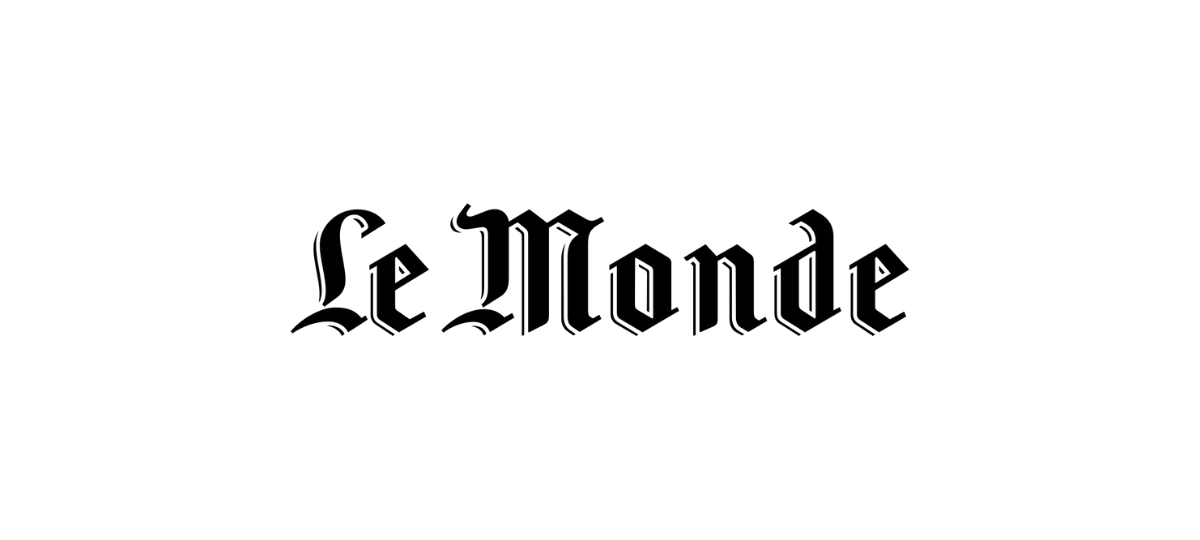